In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


In [2]:
cov = pd.read_csv("Covid Cases.csv")

In [3]:
cov

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [4]:
cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [5]:
cov.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [6]:
cov.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


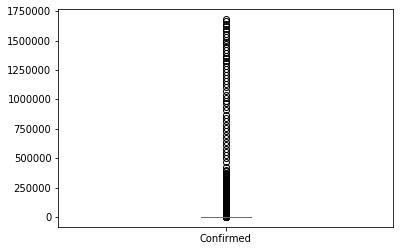

In [7]:
cov["Confirmed"].plot.box()

In [8]:
cov.skew()

Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

In [9]:
cov.tail()

,Date,Country,Confirmed,Recovered,Deaths
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7
23687,2020-05-26,Zimbabwe,56,25,4


In [10]:
confirmed = cov["Confirmed"]

In [11]:
confirmed

0          0
1          0
2          0
3          0
4          0
        ... 
23683    429
23684      9
23685    249
23686    920
23687     56
Name: Confirmed, Length: 23688, dtype: int64

In [12]:
covid = cov.drop(["Country","Date"],axis=1)

In [13]:
covid.head()

,Confirmed,Recovered,Deaths
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [14]:
from scipy.stats import zscore

In [15]:
z =np.abs(zscore(covid))

In [16]:
z

array([[0.13641539, 0.17049719, 0.13197356],
       [0.13641539, 0.17049719, 0.13197356],
       [0.13641539, 0.17049719, 0.13197356],
       ...,
       [0.13215314, 0.16983681, 0.11970126],
       [0.12066732, 0.1483084 , 0.13022038],
       [0.13545681, 0.16884624, 0.13097174]])

In [17]:
threshold = 3

In [18]:
threshold = 3 
print(np.where(z>3))

(array([ 7932,  8120,  8308,  8496,  8684,  8872,  9060,  9248,  9436,
        9624,  9812, 10000, 10188, 10376, 10564, 10752, 10940, 11128,
       11316, 11504, 11692, 11880, 12068, 12256, 12444, 12632, 12820,
       13008, 13146, 13196, 13245, 13334, 13384, 13433, 13522, 13572,
       13621, 13710, 13760, 13809, 13898, 13948, 13997, 14070, 14086,
       14136, 14185, 14258, 14274, 14274, 14324, 14373, 14446, 14462,
       14462, 14512, 14561, 14634, 14634, 14650, 14650, 14700, 14730,
       14749, 14822, 14822, 14838, 14838, 14888, 14914, 14918, 14937,
       15010, 15010, 15026, 15026, 15076, 15102, 15106, 15125, 15198,
       15198, 15214, 15214, 15264, 15290, 15294, 15313, 15386, 15386,
       15402, 15402, 15452, 15478, 15482, 15501, 15574, 15574, 15590,
       15590, 15594, 15640, 15666, 15670, 15685, 15689, 15762, 15762,
       15778, 15778, 15782, 15828, 15854, 15858, 15873, 15877, 15950,
       15950, 15966, 15966, 15966, 15970, 16016, 16042, 16046, 16061,
       16065, 16138

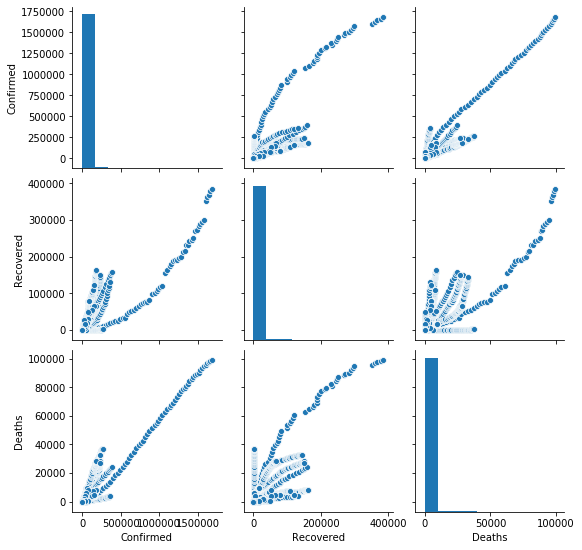

In [19]:
sns.pairplot(cov)

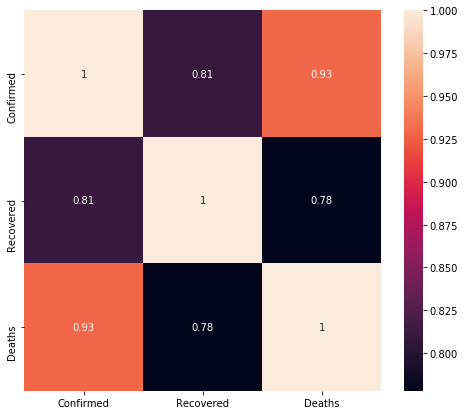

In [20]:
covcorr=covid.corr()
plt.figure(figsize=(8,7))
sns.heatmap(covcorr,annot=True)
plt.show()

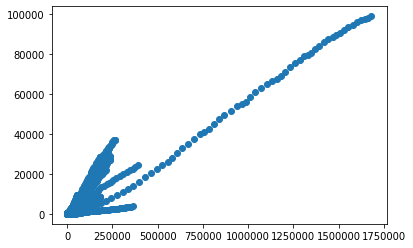

In [21]:
plt.scatter(covid["Confirmed"],covid["Deaths"])
plt.show()

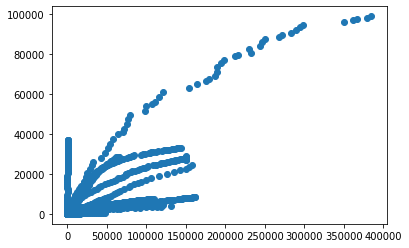

In [22]:
plt.scatter(covid["Recovered"],covid["Deaths"])

In [23]:
conew=covid[(z<3).all(axis=1)]

In [24]:
conew

,Confirmed,Recovered,Deaths
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
23683,429,365,3
23684,9,6,1
23685,249,10,49
23686,920,336,7


In [25]:
covid.shape

(23688, 3)

In [26]:
conew.shape

(23177, 3)

In [27]:
conew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23177 entries, 0 to 23687
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Confirmed  23177 non-null  int64
 1   Recovered  23177 non-null  int64
 2   Deaths     23177 non-null  int64
dtypes: int64(3)
memory usage: 724.3 KB


In [28]:
conew.describe()

,Confirmed,Recovered,Deaths
count,23177.000000,23177.000000,23177.000000
mean,2604.432239,796.582301,122.197308
std,9817.293296,3408.173090,668.490082
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,16.000000,1.000000,0.000000
75%,643.000000,98.000000,10.000000
max,177160.000000,47915.000000,12428.000000


In [29]:
x = conew.drop("Deaths",axis=1)

In [36]:
conew_1 = conew.drop("Deaths",axis=1)

In [37]:
x.shape

(23177, 2)

In [38]:
x.shape

(23177, 2)

In [39]:
y = conew["Deaths"]

In [40]:
y.shape

(23177,)

In [41]:
from sklearn.preprocessing import StandardScaler
sc  = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x,columns = conew_1.columns)

In [42]:
x

,Confirmed,Recovered
0,-0.265296,-0.233732
1,-0.265296,-0.233732
2,-0.265296,-0.233732
3,-0.265296,-0.233732
4,-0.265296,-0.233732
...,...,...
23172,-0.221597,-0.126634
23173,-0.264379,-0.231972
23174,-0.239932,-0.230798
23175,-0.171582,-0.135143


In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
from sklearn.metrics import r2_score

In [45]:
max_r_score=0
for r_state in range(42,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=r_state)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    covpred = lr.predict(x_test)
    r2_scr = r2_score(y_test,covpred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        final_r_state= r_state
print("max r2 score to ", final_r_state,"is", max_r_score)


max r2 score to  941 is 0.6241828398600003


In [46]:
lr.fit(x_train,y_train)
covpred = lr.predict(x_test)
lr.score(x_train,y_train)
print("Predicted Deaths",covpred)
print("Actual Deaths",y_test)

Predicted Deaths [-11.73462213 -10.47836986  -9.27089765 ...  18.43726619   2.60220814
   7.66736593]
Actual Deaths 9470      0
19933     3
17417     0
17538     8
3852      0
         ..
9148      0
20906     1
18207     7
10213     0
23294    12
Name: Deaths, Length: 7649, dtype: int64


In [54]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("error")
print("Mean absolute error:",mean_absolute_error(y_test,covpred))
print("mean squared error:",mean_squared_error(y_test,covpred))
print("root mean squred error:",np.sqrt(mean_squared_error(y_test,covpred)))

error
Mean absolute error: 96.13328495732075
mean squared error: 217076.98802957984
root mean squred error: 465.91521549481496


In [55]:
from sklearn.model_selection import cross_val_score
a_score = cross_val_score(LinearRegression(),x,y,cv=5,scoring ="r2")
a_score

array([-0.74679288,  0.60545029,  0.69390046,  0.55789201,  0.50178805])

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors = {"n_neighbors":range(1,30)}
knr =  KNeighborsRegressor()
gsc = GridSearchCV(knr,neighbors,cv=10)
gsc.fit(x,y)
gsc.best_params_

{'n_neighbors': 20}

In [62]:
from sklearn.linear_model import Lasso
ls = Lasso()
parameters = {"alpha":[0.0001,0.001,0.01,0.1]}
clf= GridSearchCV(ls,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.1}

In [67]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings 
warnings.filterwarnings("ignore")
gbr = GradientBoostingRegressor()
parameters = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clft = GridSearchCV(gbr,parameters,cv=5)
clft.fit(x,y)
clft.best_params_

{'learning_rate': 0.1, 'n_estimators': 10}

In [68]:
gbr = GradientBoostingRegressor(learning_rate=0.1,n_estimators =10)
print("Mean r2 score for gradient boosting regressor is" ,cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation for gradient boosting regressor is" ,cross_val_score(gbr,x,y,cv=5,scoring="r2").std())


Mean r2 score for gradient boosting regressor is 0.2824804948867632
Standard Deviation for gradient boosting regressor is 0.5815918417800924


In [70]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada= AdaBoostRegressor()
parameters = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[ls,DecisionTreeRegressor()]}
st = GridSearchCV(ada,parameters,cv=5)
st.fit(x,y)
st.best_params_

{'base_estimator': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=None,
       selection='cyclic', tol=0.0001, warm_start=False),
 'learning_rate': 0.001,
 'n_estimators': 10}

In [72]:
def maxr2_score(regr,x,y):
    max_r_score = 0 
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_score)
        if r2_scr>max_r_score:
            max_r_score = r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r2_score)
    return final_r_state